Make the necessary imports

In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))

import numpy as np
import stable_baselines3
from stable_baselines3 import PPO
from envs.stock_risk_env import StockRiskEnv
import matplotlib.pyplot as plt
import pandas as pd


Load Data and model

In [2]:
price_tensor = np.load("../data/price_tensor.npy")
env = StockRiskEnv(price_tensor, lam=0.0)
model = PPO.load("../checkpoints/ppo_riskaware")


Run the Agent

In [3]:
obs, _ = env.reset()
rewards, returns, sigmas = [], [], []

for _ in range(env.T - env.window_size - 1):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, _, info = env.step(action)
    rewards.append(reward)
    returns.append(info["return"])
    sigmas.append(info["sigma"])

portfolio = np.cumprod([1 + r for r in returns])
    

Plot equity Curve

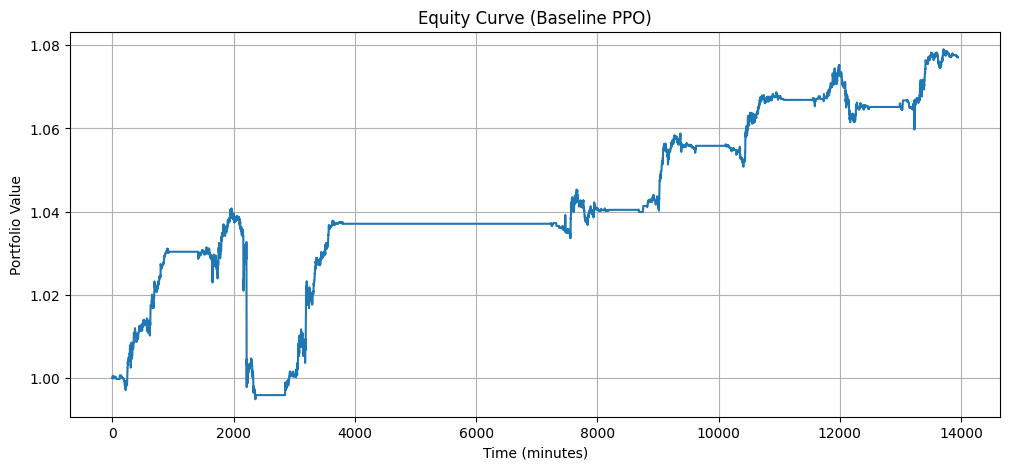

In [4]:
plt.figure(figsize=(12, 5))
plt.plot(portfolio)
plt.title("Equity Curve (Baseline PPO)")
plt.xlabel("Time (minutes)")
plt.ylabel("Portfolio Value")
plt.grid()
plt.show()


Compute Sharpe


In [5]:
returns = np.array(returns)
sharpe = (returns.mean() / returns.std()) * np.sqrt(252 * 6.5 * 60)  # annualized from minute returns
print(f"Sharpe Ratio: {sharpe:.2f}")


Sharpe Ratio: 4.57
